# DIMENSION REDUCTION

## Đề Bài

Bài 1: 
- TÌm hiểu bộ dataset *load_digits* của sklearn.
- Tiến hành giảm chiều dữ liệu dựa trên phương pháp PCA, phân tích các principle components, tìm các features có vai trò quan trọng trong việc phân lớp digits.
- Áp dụng giảm chiều dữ liệu dựa trên phương pháp LDA, vẽ biểu đồ 2 chiều thể hiện việc phân cụm các digits giữa 2 phương pháp và so sánh kết quả.

Bài 2:
- Áp dụng stemming technique trong clean data *abc_news*.
- Áp dụng LDA huấn luyện ít nhất 100000 dòng để xây dựng topic modeling.
- Trích xuất ra vài topic và thử giải thích chủ đề của chúng, vẽ word cloud cho các topic giải thích.

## Bài Làm

### Bài 1

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as datasets

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [22]:
digits = datasets.load_digits()
print(digits.data.shape)
X = digits.data
y = digits.target

(1797, 64)


In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [24]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

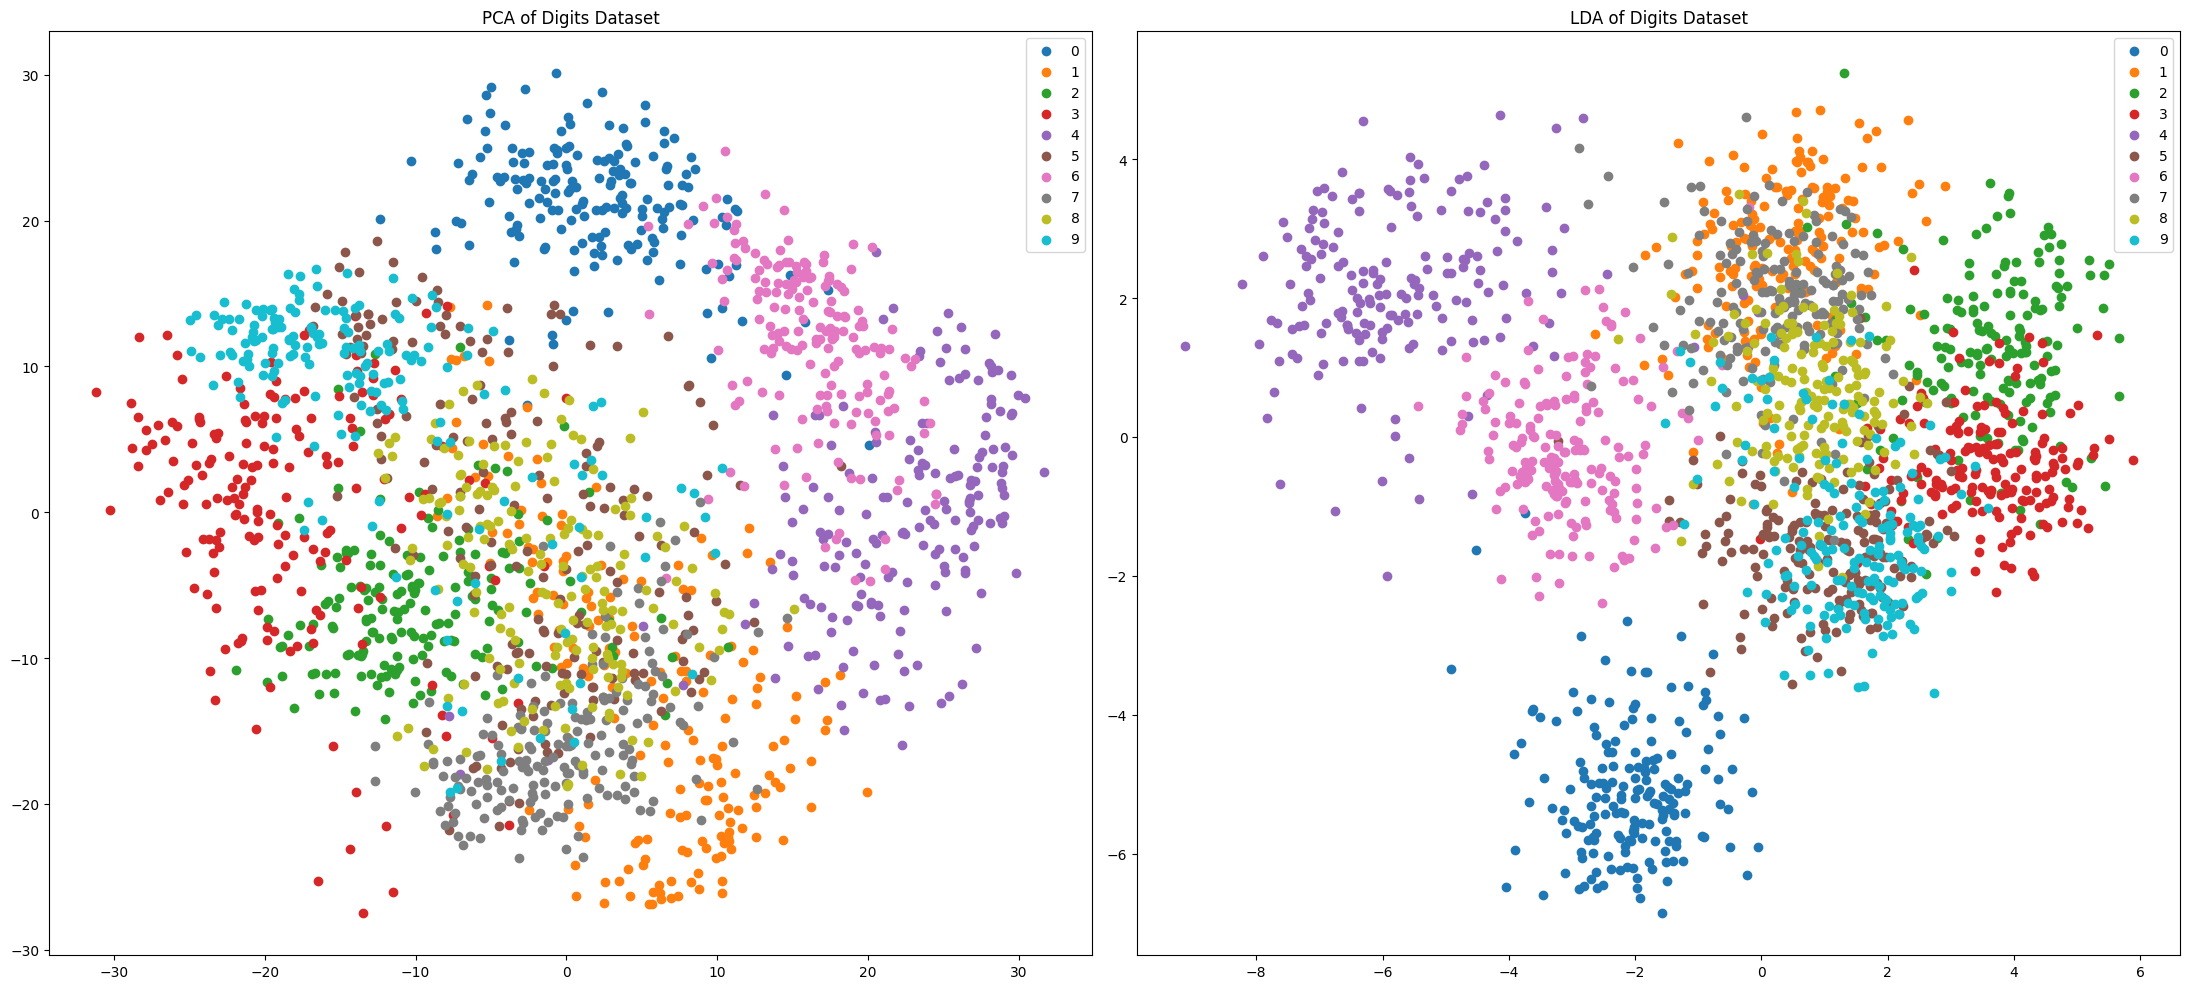

In [25]:
_, ax = plt.subplots(1, 2, figsize=(22, 10))

unique_y = np.unique(y)
titles = ['PCA of Digits Dataset', 'LDA of Digits Dataset']
data = [X_pca, X_lda]

for j in range(2):
    for i in unique_y:
        ax[j].scatter(data[j][y == i, 0], data[j][y == i, 1], label=i)
    ax[j].set_title(titles[j])
    ax[j].legend()

plt.tight_layout()

### Bài 2

In [26]:
import nltk
import string
import gensim.parsing.preprocessing as preprocessing
import matplotlib.pyplot as plt
import pandas as pd

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk import tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [27]:
df = pd.read_csv('data/abc_news.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yamia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
stemmer = PorterStemmer()

In [30]:
apply_stemming = lambda text: ' '.join([stemmer.stem(word) for word in tokenize.word_tokenize(text)])

In [31]:
df['headline_text_stemmed'] = df['headline_text'].apply(apply_stemming)
df[['headline_text', 'headline_text_stemmed']].head()

,headline_text,headline_text_stemmed
0,aba decides against community broadcasting lic...,aba decid against commun broadcast licenc
1,act fire witnesses must be aware of defamation,act fire wit must be awar of defam
2,a g calls for infrastructure protection summit,a g call for infrastructur protect summit
3,air nz staff in aust strike for pay rise,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers,air nz strike to affect australian travel


In [32]:
preprocess_text = lambda text: [word for word in text.translate(str.maketrans('', '', string.punctuation)).lower().split() if word not in preprocessing.STOPWORDS]

In [33]:
df['processed_text'] = df['headline_text'].apply(preprocess_text)

In [34]:
df_subset = df.head(100000)

In [35]:
dictionary = Dictionary(df_subset['processed_text'])

In [36]:
lda_model = LdaModel(corpus=[dictionary.doc2bow(text) for text in df_subset['processed_text']], id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=10000, passes=10)
lda_model.print_topics()

[(0,
  '0.036*"iraq" + 0.014*"killed" + 0.013*"south" + 0.012*"iraqi" + 0.010*"bush" + 0.010*"attack" + 0.010*"troops" + 0.009*"war" + 0.009*"bomb" + 0.009*"australian"'),
 (1,
  '0.016*"world" + 0.013*"fears" + 0.011*"rejects" + 0.010*"australia" + 0.010*"cup" + 0.010*"national" + 0.010*"support" + 0.009*"industry" + 0.009*"drought" + 0.009*"england"'),
 (2,
  '0.025*"boost" + 0.017*"funds" + 0.014*"budget" + 0.012*"trade" + 0.012*"tour" + 0.010*"wins" + 0.010*"gets" + 0.009*"free" + 0.009*"consider" + 0.009*"funding"'),
 (3,
  '0.035*"govt" + 0.017*"urged" + 0.016*"health" + 0.015*"plan" + 0.015*"new" + 0.011*"nsw" + 0.011*"public" + 0.010*"hospital" + 0.010*"water" + 0.010*"indigenous"'),
 (4,
  '0.014*"lead" + 0.011*"pakistan" + 0.009*"title" + 0.009*"french" + 0.008*"child" + 0.007*"leads" + 0.007*"defence" + 0.007*"israel" + 0.007*"warned" + 0.006*"win"'),
 (5,
  '0.013*"return" + 0.009*"warning" + 0.008*"rules" + 0.008*"season" + 0.007*"atsic" + 0.007*"team" + 0.007*"battle" + 0

- Chủ đề **0**: Có vẻ như chủ đề này tập trung vào vấn đề liên quan đến chiến sự ở Iraq. Các từ khóa như *"iraq"*, *"killed"*, *"iraqi"*, *"bush"*, *"attack"*, *"troops"*, *"war"*, *"bomb"*, *"australian"* cho thấy sự tập trung vào các sự kiện chiến tranh, các hành động quân sự và liên quan đến cả quân đội Australia.

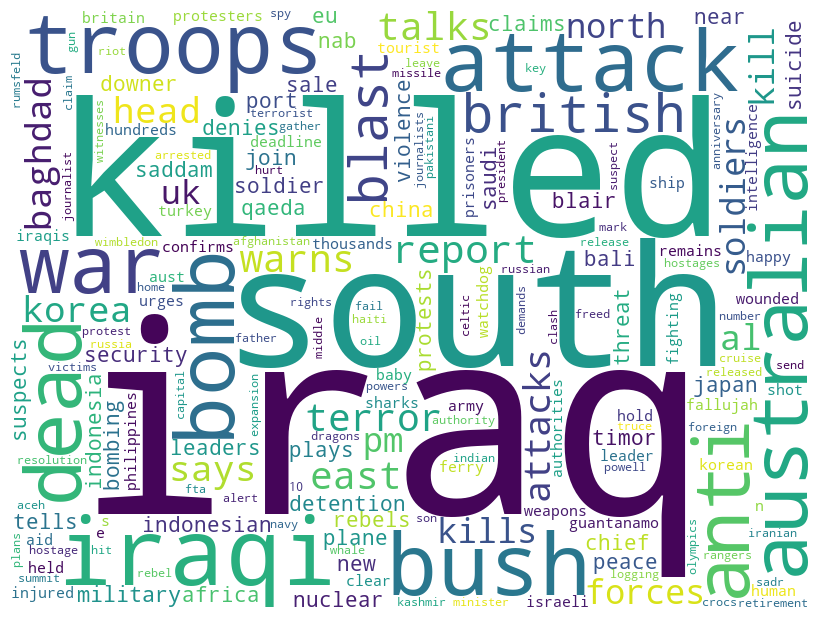

In [37]:
plt.figure(figsize = (8, 6))
plt.imshow(WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate_from_frequencies({word: weight for word, weight in lda_model.show_topic(0, topn=len(dictionary))}))
plt.axis("off")
plt.tight_layout(pad = 0)

- Chủ đề **1**: Chủ đề này dường như liên quan đến thể thao và sự kiện quốc tế với các từ khóa như *"world"*, *"fears"*, *"australia"*, *"cup"*, *"national"*, *"support"*, *"industry"*, *"drought"*, *"england"*. Có thể chủ đề này bao gồm các tin tức về các giải đấu thể thao như World Cup và liên quan đến các đội tuyển quốc gia.

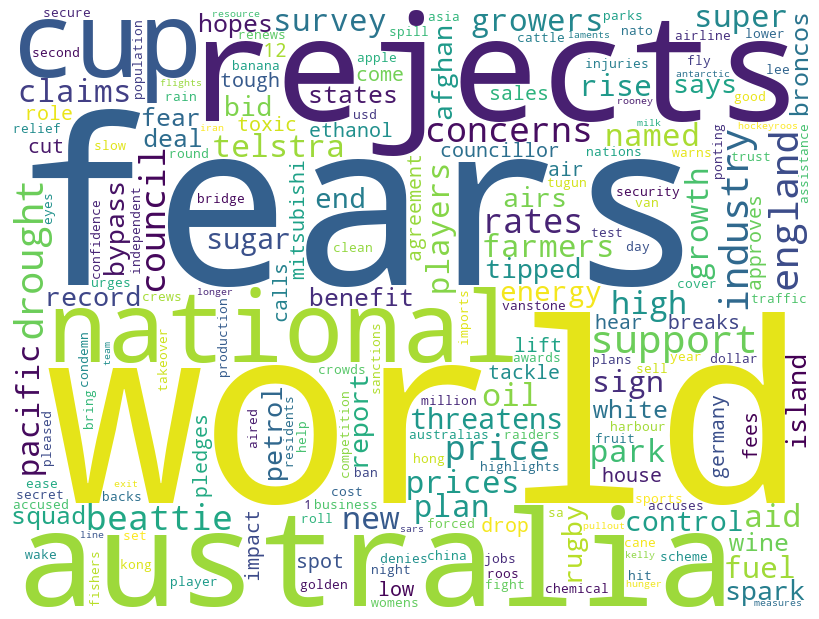

In [38]:
plt.figure(figsize = (8, 6))
plt.imshow(WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate_from_frequencies({word: weight for word, weight in lda_model.show_topic(1, topn=len(dictionary))}))
plt.axis("off")
plt.tight_layout(pad = 0)

- Chủ đề **3**: Chủ đề này tập trung vào chính sách và sức khỏe công cộng với các từ khóa *"govt"* (chính phủ), *"urged"*, *"health"*, *"plan"*, *"new"*, *"nsw"*, *"public"*, *"hospital"*, *"water"*, *"indigenous"*. Điều này có thể bao gồm các vấn đề về kế hoạch chăm sóc sức khỏe mới, cơ sở hạ tầng công cộng và các sáng kiến liên quan đến cộng đồng bản địa.

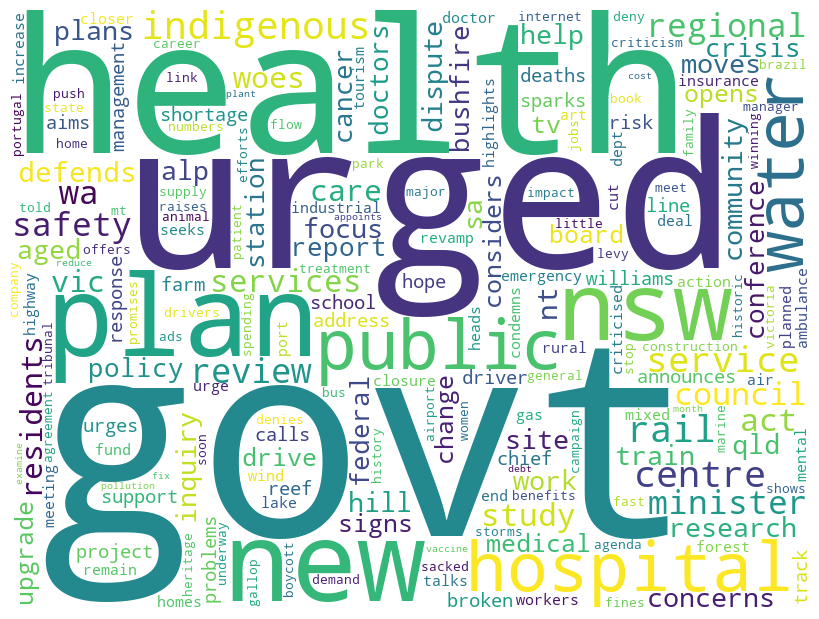

In [39]:
plt.figure(figsize = (8, 6))
plt.imshow(WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate_from_frequencies({word: weight for word, weight in lda_model.show_topic(3, topn=len(dictionary))}))
plt.axis("off")
plt.tight_layout(pad = 0)

- Chủ đề **6**: Chủ đề này rõ ràng liên quan đến pháp luật và trật tự với *"police"*, *"man"*, *"court"*, *"probe"*, *"death"*, *"crash"*, *"sydney"*, *"murder"*, *"face"*, *"drug"*. Điều này cho thấy các tin tức về tội phạm, điều tra, và các vụ án pháp lý, bao gồm cả tai nạn và cáo buộc về ma túy.

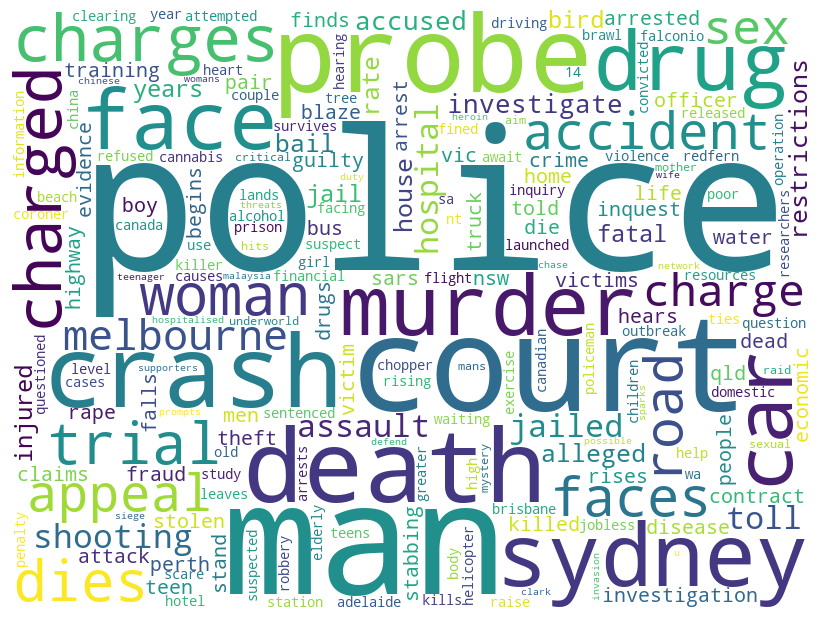

In [40]:
plt.figure(figsize = (8, 6))
plt.imshow(WordCloud(width = 800, height = 600, background_color ='white', min_font_size = 10).generate_from_frequencies({word: weight for word, weight in lda_model.show_topic(6, topn=len(dictionary))}))
plt.axis("off")
plt.tight_layout(pad = 0)